<a href="https://colab.research.google.com/github/Staticstic/Data-Analysis-practice/blob/main/%EC%95%B1%EC%8A%A4%ED%86%A0%EC%96%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앱 스토어 데이터 분석
***

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
#AppleGothic (한글 글씨체 나눔고딕 다운로드)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font',family="NanumBarunGothic")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (22.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and dir

In [ ]:
game_all = pd.read_csv("/content/game_all_20230404.csv")

# 데이터 전체 확인
***

In [ ]:
#행과열을 확인
game_all.shape

(32476, 9)

In [ ]:
#데이터 정보 확인
game_all.info()

# 숫자 : int / float (소숫점 형태)
# 문자 : object (string)
# 날짜 : datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32476 entries, 0 to 32475
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         32476 non-null  int64 
 1   date       32476 non-null  int64 
 2   dateYear   32476 non-null  int64 
 3   dateMonth  32476 non-null  int64 
 4   dateDay    32476 non-null  int64 
 5   rating     32476 non-null  int64 
 6   userName   32476 non-null  object
 7   content    32476 non-null  object
 8   game       32476 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.2+ MB


In [ ]:
game_all.head()

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,game
0,0,20230408,2023,4,8,1,뇌세포,결장 밸런스 좀 잡아라. 버서커는 슈퍼 아머 떡칠에 쿨도 짧고 데미지도 쎄고 범위도...,던전앤파이터 모바일
1,1,20230313,2023,3,13,1,허정선,축하합니다! 전체적으로 여론 나락이여서 1주년 행사에서 띵진이형 모셔와도 시원하게 ...,던전앤파이터 모바일
2,2,20220324,2022,3,24,1,웨옹,성인인증 오류뜨는것도 오류인데... 게임 시작하려고 서버 로그인 하면 계속 로그인중...,던전앤파이터 모바일
3,3,20230124,2023,1,24,5,김강민,던파를 처음 해보는데 진짜 너무 재밌네요 레어 아바타도 공짜로 주고 진짜 개꿀잼 아...,던전앤파이터 모바일
4,4,20230105,2023,1,5,4,송하윤,12세 던파에도 경매장이나 경매장을 대신할 시스템을 추가해주시면 감사하겠습니다.기존...,던전앤파이터 모바일


In [ ]:
game_all.describe(include="object")

,userName,content,game
count,32476,32476,32476
unique,26448,30044,8
top,Google 사용자,몰?루,블루아카이브
freq,751,349,8776


In [ ]:
df.describe()

,id,date,dateYear,dateMonth,dateDay,rating
count,32476.000000,3.247600e+04,32476.000000,32476.000000,32476.000000,32476.000000
mean,16237.500000,2.022008e+07,2021.952519,5.358572,16.627263,3.326456
std,9375.158008,1.150650e+04,1.175563,3.903152,9.061298,1.704325
min,0.000000,2.018091e+07,2018.000000,1.000000,1.000000,1.000000
25%,8118.750000,2.021112e+07,2021.000000,2.000000,9.000000,1.000000
50%,16237.500000,2.022113e+07,2022.000000,4.000000,16.000000,4.000000
75%,24356.250000,2.023022e+07,2023.000000,9.000000,25.000000,5.000000
max,32475.000000,2.023041e+07,2023.000000,12.000000,31.000000,5.000000


In [ ]:
df.game.value_counts()

블루아카이브         8776
피파 모바일         6840
카트라이더 드리프트     4586
프라시아 전기        4200
카트라이더 러쉬플러스    3920
바람의나라 연        1760
메이플스토리 m       1600
던전앤파이터 모바일      794
Name: game, dtype: int64

# 파생변수
***

In [ ]:
df['game'].unique()

array(['던전앤파이터 모바일', '메이플스토리 m', '바람의나라 연', '카트라이더 러쉬플러스', '피파 모바일',
       '블루아카이브', '프라시아 전기', '카트라이더 드리프트'], dtype=object)

In [ ]:
# 게임 별 유통 회사 변수 생성

def company(x):
    if x in ('가디언테일즈', '달빛조각사', '오딘발할라라이징', '아키에이지워', '우마무스메'):
      return '카카오게임즈'
    elif x in ('블루아카이브', '바람의나라연', '프라시아전기'):
      return '넥슨'
    elif x in ('리니지m', '리니지w'):
      return '엔씨소프트'
    elif x == '검은사막':
      return '펄어비스'
    elif x == '배틀그라운드':
      return '크래프톤'
    elif x == '미르':
      return '위메이드'
    elif x == '쿠키런킹덤':
      return '데브시스터즈'
    elif x == '탕탕특공대':
      return 'Habby'
    elif x == '원신':
      return 'HoYoverse'

game_all['COMPANY']=game_all['GAME'].apply(company)

In [ ]:
# 게임 별 제목 수 , 리뷰 수 파생 변수 생성
game_all["제목수"]=game_all.TITLE.apply(lambda x:len(x))
game_all["리뷰수"]=game_all.REVIEW.apply(lambda x:len(x))
game_all["닉네임수"]=game_all.USER.apply(lambda x:len(x))

In [ ]:
game_all

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME,COMPANY,제목수,리뷰수,닉네임수
0,아아거록,2023-04-02 10:08:55-07:00,5,0,ㄴㄴ,ㄷㅈㄷㅇ,가디언테일즈,카카오게임즈,2,4,4
1,조가리,2023-03-28 22:19:48-07:00,5,0,초보와 고수가 함께하는 화목한게임,경쟁을 부추기지 않는 게임이라 가능한 분위기\n길드 만들었는데 고수님들 들어와주셔서...,가디언테일즈,카카오게임즈,18,74,3
2,와구와구왕왕,2023-03-27 16:09:04-07:00,5,0,갑자기 렉이 너무 심해졌어요,다른 게임은 그대로인데 이번 업뎃에서 끊김현상부터 렉이 어마어마하네요 렉땜에 자꾸 ...,가디언테일즈,카카오게임즈,15,60,6
3,너너머유낳오토쥬옽,2023-03-27 05:01:02-07:00,4,0,넘 어려워요,지금 월드 12에서 막혀서 부활을 계속하는데도 안깨져요 ㅠㅠㅠ,가디언테일즈,카카오게임즈,6,34,9
4,아랄러로,2023-03-26 06:32:46-07:00,1,0,아이폰 14프로 맨날 튕긴다구요!!!!!!!!,아니!!!!! 맨날 들어갈때마다 튕긴다구요 퓨ㅠㅠㅠㅠㅠ\n거울균열 돌다 튕겨 카마존...,가디언테일즈,카카오게임즈,25,218,4
...,...,...,...,...,...,...,...,...,...,...,...
7829,말딸 왜함 ㅋㅋ,2022-09-01 18:37:35-07:00,2,0,ㅋㅋㅋ,ㅋㅋㅋㅋ 안함,우마무스메,카카오게임즈,3,7,8
7830,리우메이,2022-09-01 18:36:22-07:00,1,0,ㅋㅋㅋㅋ,불탄다 불타,우마무스메,카카오게임즈,4,6,4
7831,NeoBlueice,2022-09-01 18:09:01-07:00,1,0,이런 운영은 처음,"몰래 공지를 수정하지 않나, 유저들이 제발 운영 좀 정상적으로 해달라는 요구에 안 ...",우마무스메,카카오게임즈,9,60,10
7832,@@#8282828,2022-09-01 17:21:51-07:00,1,0,운영 제대로좀 팅긴다,팅긴다고!! 운영 제대로 좀 해라 계속 팅기는데 업데이트 안해줌,우마무스메,카카오게임즈,11,35,10


In [ ]:
# game_all["DATE"]=pd.to_datetime(game_all["DATE"])
game_all["DATE"]=pd.to_datetime(game_all["DATE"])

In [ ]:
#object 형식이였던 데이터를 변경할 수 있음
game_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype                                 
---  ------   --------------  -----                                 
 0   USER     7834 non-null   object                                
 1   DATE     7834 non-null   datetime64[ns, pytz.FixedOffset(-420)]
 2   STAR     7834 non-null   int64                                 
 3   LIKE     7834 non-null   int64                                 
 4   TITLE    7834 non-null   object                                
 5   REVIEW   7834 non-null   object                                
 6   GAME     7834 non-null   object                                
 7   COMPANY  7834 non-null   object                                
 8   제목수      7834 non-null   int64                                 
 9   리뷰수      7834 non-null   int64                                 
 10  닉네임수     7834 non-null   int64                              

In [ ]:
#파생변수 생성 (데이터 추출)
game_all["month"]=game_all["DATE"].dt.month
game_all["day"]=game_all["DATE"].dt.day
game_all["hour"]=game_all["DATE"].dt.hour
game_all["minute"]=game_all["DATE"].dt.minute
# 0:월 ~ 6:일
game_all["day_name"]=game_all['DATE'].dt.weekday

In [ ]:
# 요일 한글로 적용하는 법
weekday_list=['월', '화', '수', '목', '금', '토', '일']
game_all['요일']=game_all.apply(lambda x: weekday_list[x['day_name']], axis=1)

In [ ]:
game_all.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME,COMPANY,제목수,리뷰수,닉네임수,month,day,hour,minute,day_name,요일
0,아아거록,2023-04-02 10:08:55-07:00,5,0,ㄴㄴ,ㄷㅈㄷㅇ,가디언테일즈,카카오게임즈,2,4,4,4,2,10,8,6,일
1,조가리,2023-03-28 22:19:48-07:00,5,0,초보와 고수가 함께하는 화목한게임,경쟁을 부추기지 않는 게임이라 가능한 분위기\n길드 만들었는데 고수님들 들어와주셔서...,가디언테일즈,카카오게임즈,18,74,3,3,28,22,19,1,화
2,와구와구왕왕,2023-03-27 16:09:04-07:00,5,0,갑자기 렉이 너무 심해졌어요,다른 게임은 그대로인데 이번 업뎃에서 끊김현상부터 렉이 어마어마하네요 렉땜에 자꾸 ...,가디언테일즈,카카오게임즈,15,60,6,3,27,16,9,0,월
3,너너머유낳오토쥬옽,2023-03-27 05:01:02-07:00,4,0,넘 어려워요,지금 월드 12에서 막혀서 부활을 계속하는데도 안깨져요 ㅠㅠㅠ,가디언테일즈,카카오게임즈,6,34,9,3,27,5,1,0,월
4,아랄러로,2023-03-26 06:32:46-07:00,1,0,아이폰 14프로 맨날 튕긴다구요!!!!!!!!,아니!!!!! 맨날 들어갈때마다 튕긴다구요 퓨ㅠㅠㅠㅠㅠ\n거울균열 돌다 튕겨 카마존...,가디언테일즈,카카오게임즈,25,218,4,3,26,6,32,6,일


In [ ]:
#그냥 하면 인코딩이 안되어있어서 한글도 알파벳으로 나올 수 있기 때문에 encode를 필수적으로 진행해야된다.

#lambda(x : (결과1) if (조건) else (결과2))

game_all["nickname_alpha"]=game_all.USER.apply(lambda x: "alpha" if x.encode().isalpha() else "not")

In [ ]:
#- 전체 글자 별 제목 비율
game_all["all_text_data_length"]=game_all["제목수"]+game_all["리뷰수"]

# 전체 게임 데이터 분석
***

In [ ]:
#게임 별 게임사 분포 확인
game_all.groupby('COMPANY')['GAME'].nunique().to_frame().reset_index()

,COMPANY,GAME
0,Habby,1
1,HoYoverse,1
2,넥슨,3
3,데브시스터즈,1
4,엔씨소프트,2
5,위메이드,1
6,카카오게임즈,5
7,크래프톤,1
8,펄어비스,1


In [ ]:
#게임사별 게임들의 리뷰 평균 구하기
company_star=game_all.groupby('COMPANY')['STAR'].mean().to_frame().reset_index()
company_star

,COMPANY,STAR
0,Habby,3.518000
1,HoYoverse,4.248000
2,넥슨,2.643928
3,데브시스터즈,3.570000
4,엔씨소프트,1.837000
5,위메이드,2.200000
6,카카오게임즈,3.123200
7,크래프톤,2.750000
8,펄어비스,4.490000


Text(0, 0.5, '평점')

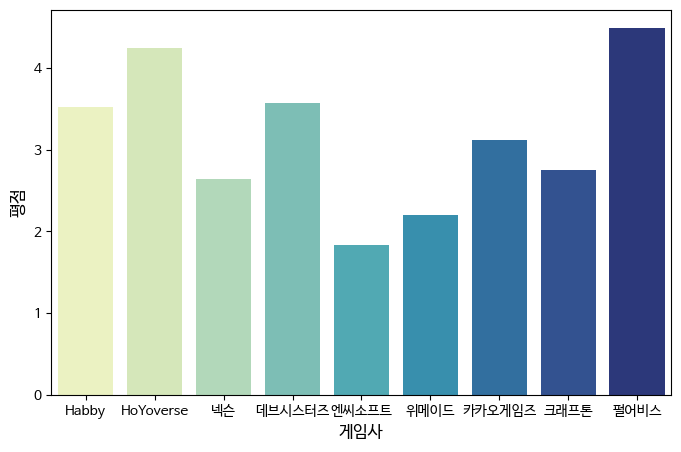

In [ ]:
plt.figure(figsize=(8, 5))
c_p=sns.barplot(x="COMPANY", y="STAR", data=company_star,  palette='YlGnBu')
c_p.set_xlabel("게임사", fontsize = 12)
c_p.set_ylabel("평점", fontsize = 12)

In [ ]:
game_star=game_all.groupby('GAME')['STAR'].mean().to_frame().reset_index()
game_star

,GAME,STAR
0,가디언테일즈,3.342000
1,검은사막,4.490000
2,달빛조각사,3.478000
3,리니지m,1.828000
4,리니지w,1.846000
5,미르,2.200000
6,바람의나라연,1.878000
7,배틀그라운드,2.750000
8,블루아카이브,3.358000
9,아키에이지워,3.462000


Text(0, 0.5, '평점')

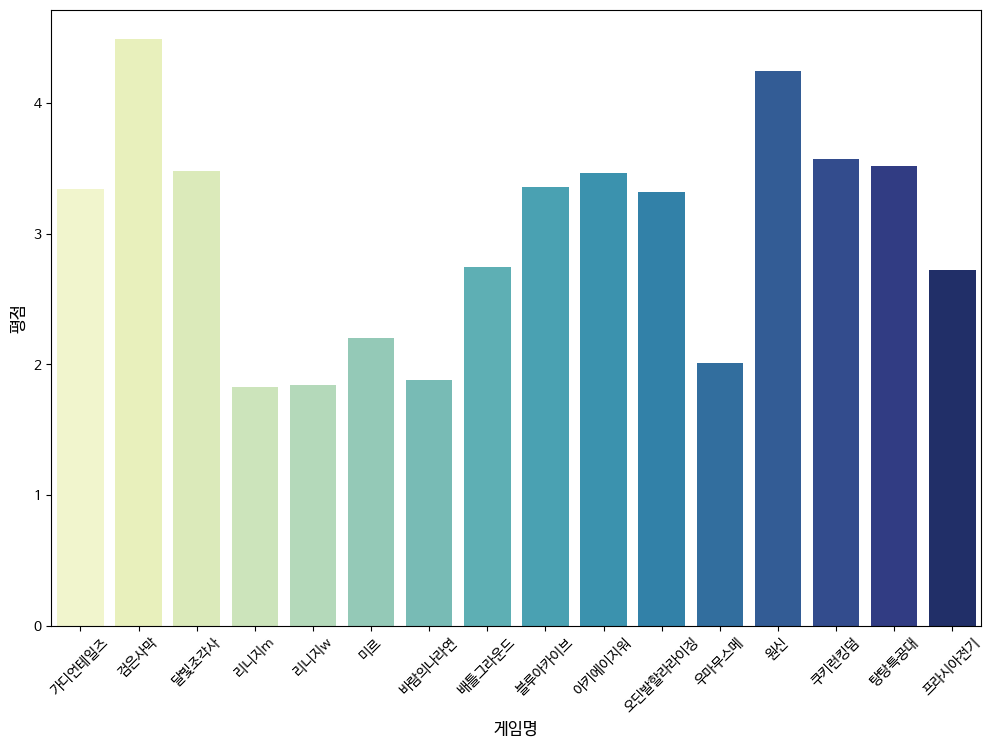

In [ ]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
g_p=sns.barplot(x="GAME", y="STAR", data=game_star,  palette='YlGnBu')
g_p.set_xlabel("게임명", fontsize = 12)
g_p.set_ylabel("평점", fontsize = 12)

In [ ]:
# round(숫자,자릿수) : 자릿수 까지 남기고 다음 자릿수에서 반올림한다.

# {0} , {1} .format(1,2)
# %s : 문자 %d :정수 %f : 실수 , %(값)

print("전체 게임 평균 평점 {0}".format(round(game_all["STAR"].mean(),2)))
print("전체 게임 평균 평점 %f "%(round(game_all["STAR"].mean(),2)))

전체 게임 평균 평점 3.01
전체 게임 평균 평점 3.010000 


In [ ]:
#len(game_all[game_all["LIKE"]>0]) : like수가 0 초과인 애들에 대한 수
#len(game_all) : 행의 수


print("전체 좋아요를 받은 전체 댓글 비율 {0}%".format(round(len(game_all[game_all["LIKE"]>0])/len(game_all)*100,2)))

전체 좋아요를 받은 전체 댓글 비율 2.71%


In [ ]:
game_all[game_all["LIKE"]>0].GAME.value_counts()

쿠키런킹덤       44
원신          42
미르          28
가디언테일즈      17
블루아카이브      14
리니지m        12
우마무스메       11
달빛조각사        9
배틀그라운드       8
바람의나라연       8
리니지w         7
탕탕특공대        5
검은사막         4
오딘발할라라이징     2
프라시아전기       1
Name: GAME, dtype: int64

## 좋아요가 있는 데이터 확인

## 데이터의 상관관계 확인
***

In [ ]:
game_corr=game_all.corr()

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


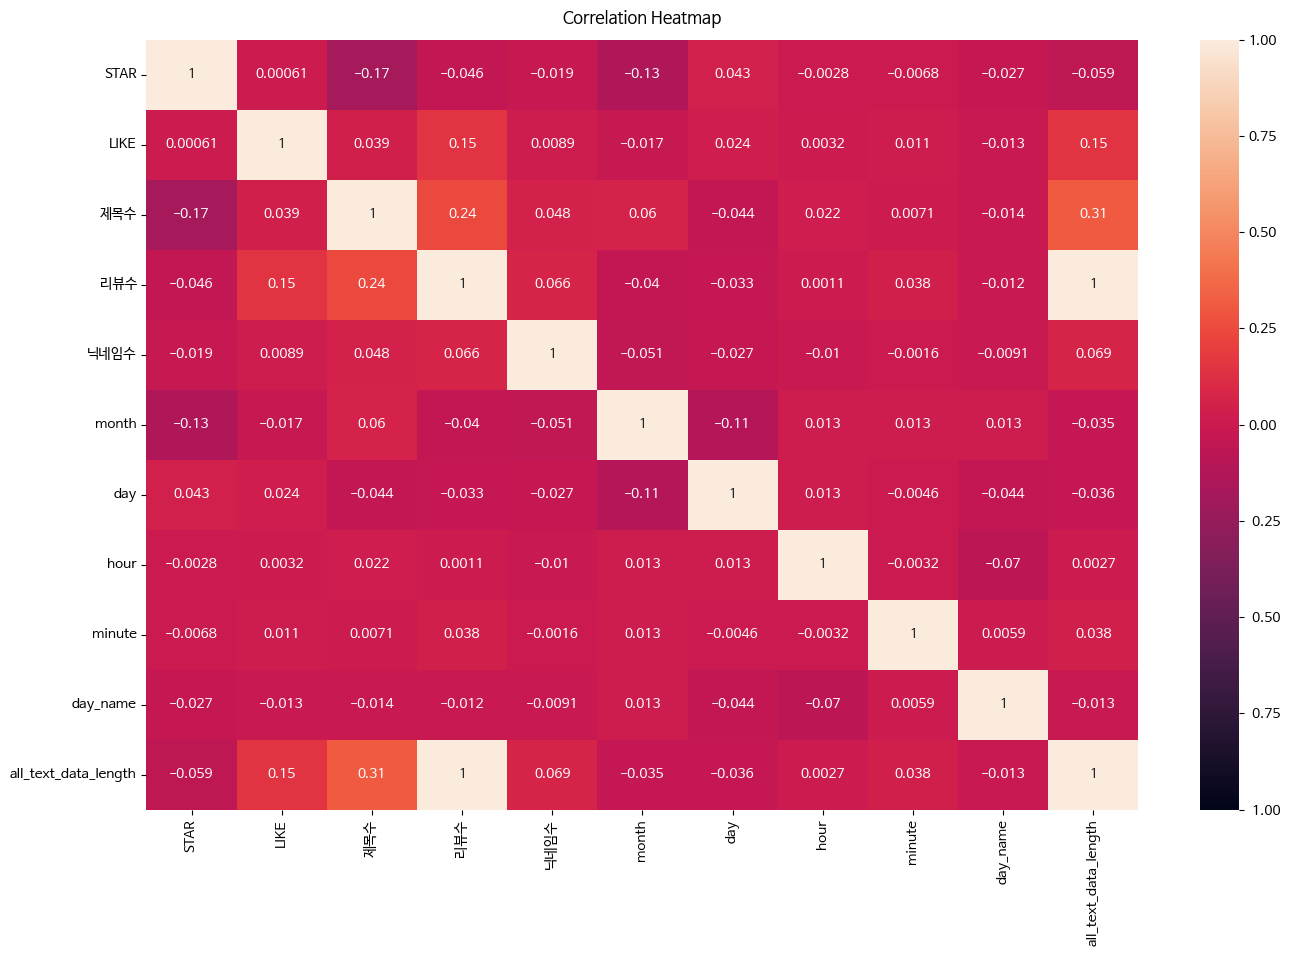

In [ ]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(game_all.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


#plotly -> 시각화 패키지 -> 한글 호환

## 긍정 데이터 / 부정 데이터 비율 확인

In [ ]:
game_all.groupby('COMPANY')['STAR'].describe()

,count,mean,std,min,25%,50%,75%,max
COMPANY,,,,,,,,
Habby,500.0,3.518000,1.745787,1.0,1.0,5.0,5.0,5.0
HoYoverse,500.0,4.248000,1.398000,1.0,4.0,5.0,5.0,5.0
넥슨,1334.0,2.643928,1.787232,1.0,1.0,2.0,5.0,5.0
데브시스터즈,500.0,3.570000,1.585600,1.0,2.0,4.0,5.0,5.0
엔씨소프트,1000.0,1.837000,1.508876,1.0,1.0,1.0,2.0,5.0
위메이드,500.0,2.200000,1.695213,1.0,1.0,1.0,4.0,5.0
카카오게임즈,2500.0,3.123200,1.874200,1.0,1.0,4.0,5.0,5.0
크래프톤,500.0,2.750000,1.739411,1.0,1.0,2.0,5.0,5.0
펄어비스,500.0,4.490000,1.129802,1.0,5.0,5.0,5.0,5.0


In [ ]:
positive_review=game_all[game_all["STAR"]>3]
negative_review=game_all[game_all["STAR"]<=3]

In [ ]:
len(positive_review)

3721

In [ ]:
len(negative_review)

4113

In [ ]:
game_all["STAR_posneg"]=game_all.STAR.apply(lambda x: "pos" if x>3 else "neg")

In [ ]:
positive_review.mean()

<ipython-input-69-5e4b21e6d616>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  positive_review.mean()
<ipython-input-69-5e4b21e6d616>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  positive_review.mean()


STAR                     4.860521
LIKE                     0.041655
제목수                      8.188659
리뷰수                     58.146466
닉네임수                     5.971513
month                    4.933889
day                     17.190809
hour                    10.817522
minute                  29.312282
day_name                 2.793066
all_text_data_length    66.335125
dtype: float64

In [ ]:
negative_review.mean()

<ipython-input-70-31d6de7a6d09>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  negative_review.mean()
<ipython-input-70-31d6de7a6d09>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  negative_review.mean()


STAR                     1.330902
LIKE                     0.038172
제목수                     10.742281
리뷰수                     66.265257
닉네임수                     6.096280
month                    5.801848
day                     16.465840
hour                    10.877948
minute                  29.465111
day_name                 2.903963
all_text_data_length    77.007537
dtype: float64

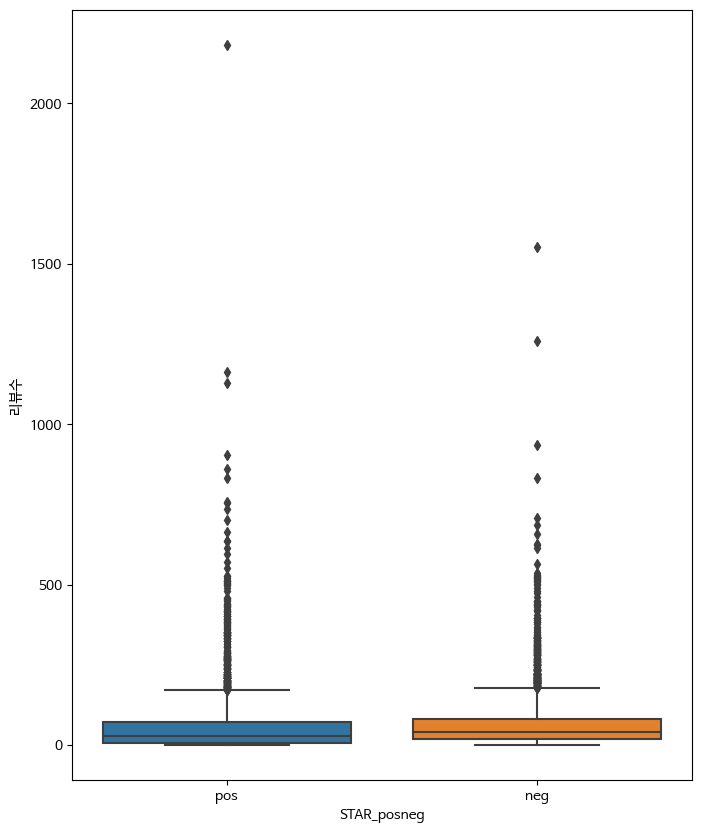

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(y = "리뷰수", x="STAR_posneg",data =game_all)
plt.show()

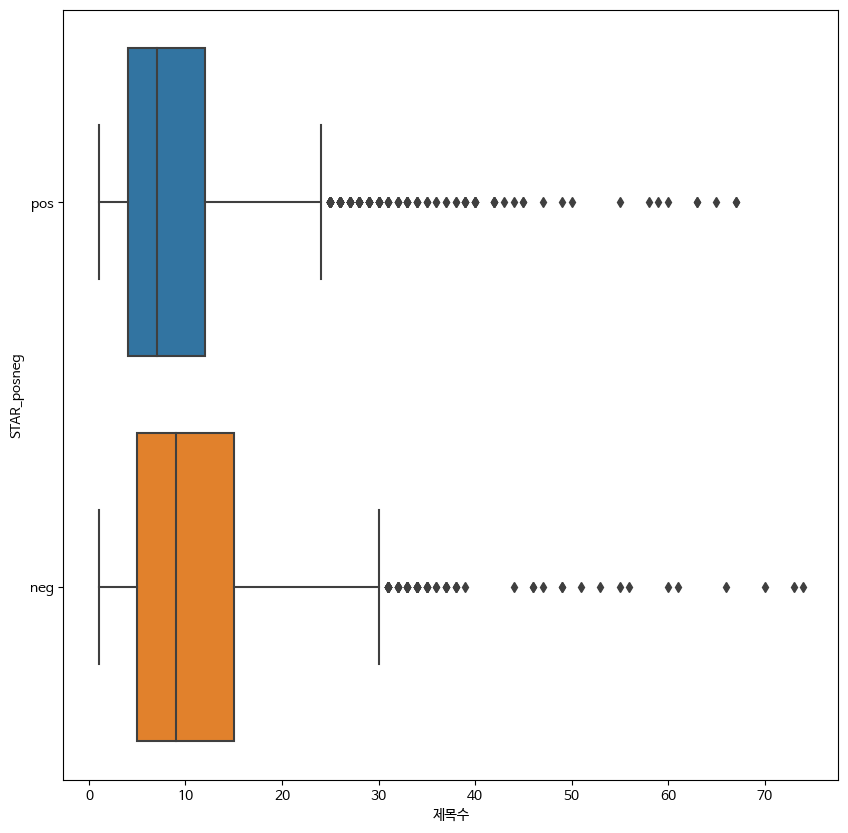

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= "제목수", y="STAR_posneg",data =game_all)
plt.savefig('temp.jpg')
plt.show()


# 시간 별 데이터 분석
***

In [ ]:
def data_groupby_time(column_name):
  data_all=game_all.groupby(column_name).count().reset_index()[[column_name,"TITLE"]]
  return data_all

In [ ]:
day_table=data_groupby_time("day")
month_table=data_groupby_time("month")
hour_table=data_groupby_time("hour")
minute_table=data_groupby_time("minute")

<Axes: xlabel='day', ylabel='TITLE'>

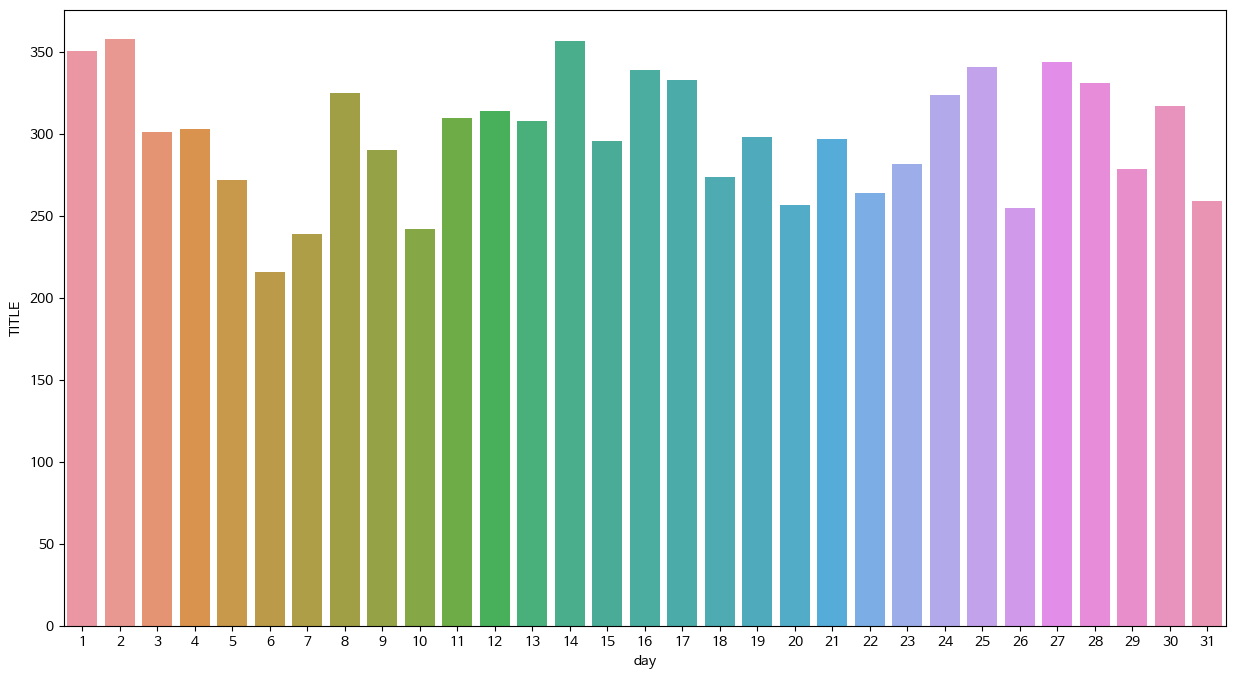

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="day", y="TITLE",data=day_table)

<Axes: xlabel='month', ylabel='TITLE'>

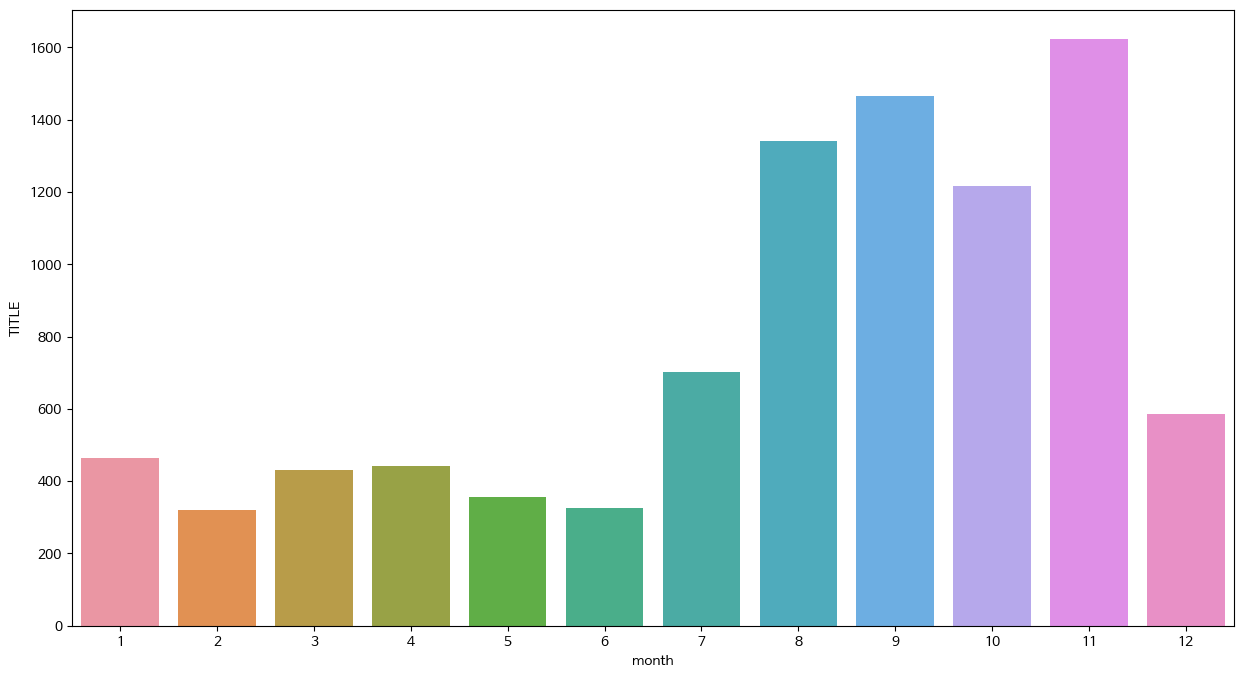

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="month", y="TITLE",data=month_table)

<Axes: xlabel='hour', ylabel='TITLE'>

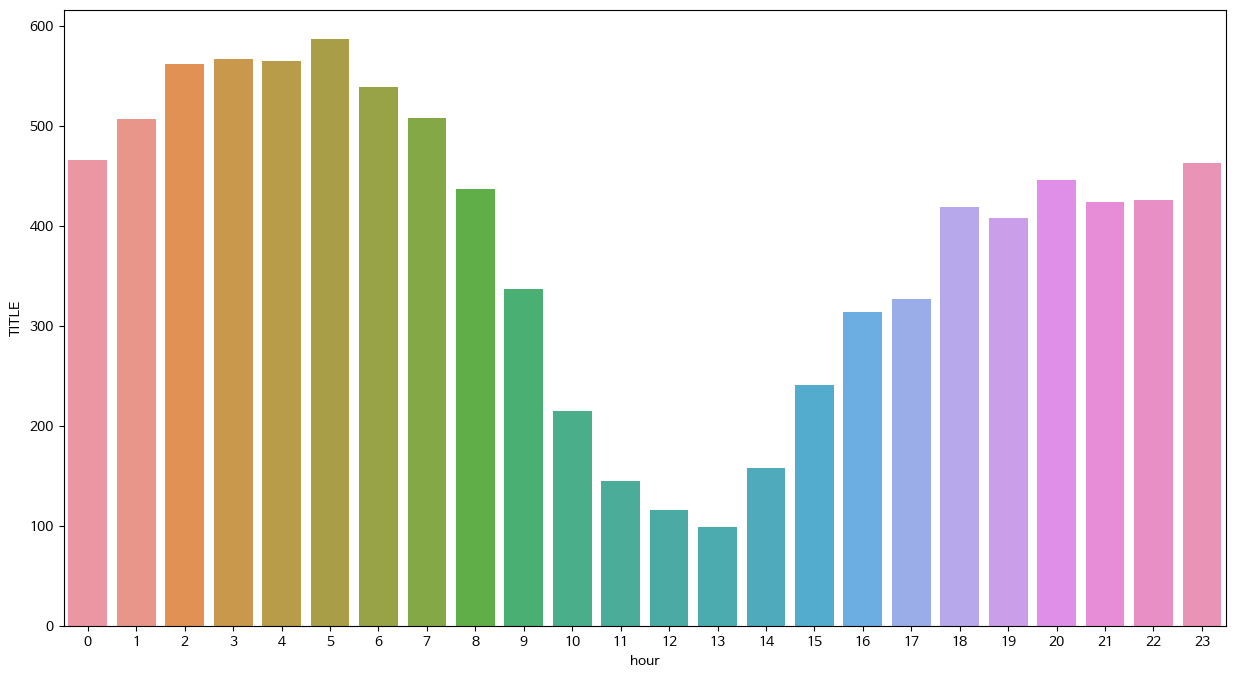

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="hour", y="TITLE",data=hour_table)

<Axes: xlabel='minute', ylabel='TITLE'>

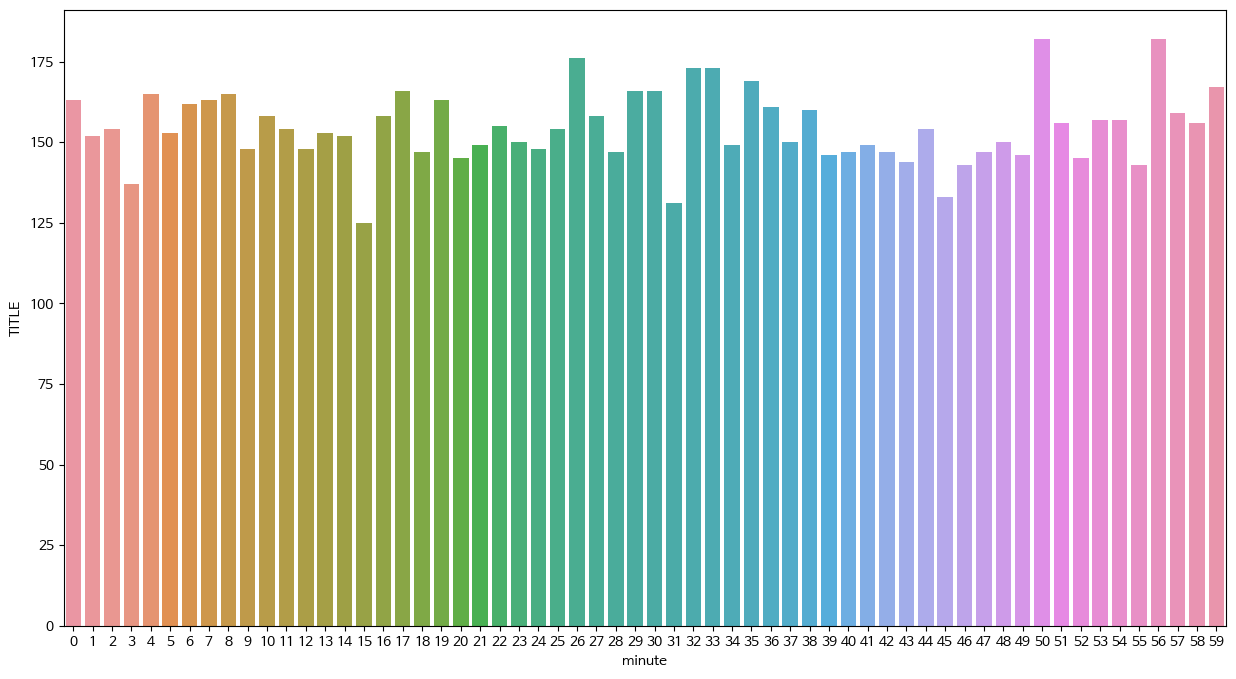

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="minute", y="TITLE",data=minute_table)

## 닉네임 별 데이터 수
***

In [ ]:
game_all.groupby("USER").count().reset_index()[["USER","DATE"]].sort_values(by=["DATE"],ascending=False).head(10)

,USER,DATE
258,Arialuca,3
6221,애옹 나 고양이,3
4748,밀크냥냥이,3
7743,지한이에요,3
1283,hadigreece,3
7699,지나가던슬라임,3
915,aeroairbreath,2
8102,케이맥스,2
3315,나체위한숨,2
2482,가민블매,2


In [ ]:
# 같은 닉네임을 가지고 있으면 한 유저라고 가정
same_nickname=game_all.groupby("USER").count().reset_index()[["USER","DATE"]].sort_values(by=["DATE"],ascending=False)

In [ ]:
str(round(len(same_nickname[same_nickname["DATE"]>1])/len(game_all)*100,2))+"%"

'1.35%'

In [ ]:
same_nickname.head()

,USER,DATE
258,Arialuca,3
6221,애옹 나 고양이,3
4748,밀크냥냥이,3
7743,지한이에요,3
1283,hadigreece,3


In [ ]:
game_all[game_all["USER"]=="애옹 나 고양이"][["STAR","REVIEW","GAME"]]

,STAR,REVIEW,GAME
4177,1,판 다 깔아줘도 운영 ㅈㄴ못함\n그냥 섭종해라ㅋㅋ,우마무스메
4988,5,지금까지 많은 게임을 해왔지만 원신 미만 잡이에요\n퀄리티 도람ㅅ음 너무 재밌어 짜...,원신
7320,3,3성떠도 픽업캐가 안나옴…뭐 가끔 운 정말 좋으면 픽업캐가 나오긴하지만 10번 뽑으...,블루아카이브


# 전체 글자 별 제목 비율
***

In [ ]:
game_all["제목 차지비율"]=game_all["제목수"]/game_all["all_text_data_length"]*100

In [ ]:
game_all["제목 차지비율"].describe()

count    9276.000000
mean       23.418822
std        19.867915
min         0.161943
25%         8.333333
50%        16.666667
75%        33.333333
max        98.076923
Name: 제목 차지비율, dtype: float64

In [ ]:
game_all_1000=game_all.sort_values(by=["all_text_data_length"],ascending=False).head(1000)
game_all_1000.STAR.mean()

2.819

## 게임 별 데이터 분석
***

In [ ]:
game_all.GAME.value_counts()

검은사막        500
던전앤파이터      500
달빛조각사       500
배틀그라운드      500
블루아카이브      500
피파온라인4m     500
탕탕특공대       500
쿠키런킹덤       500
원신          500
우마무스메       500
오딘          500
세븐나이츠       500
메이플스토리m     500
마구마구        500
리니지w        500
리니지2레볼루션    500
가디언테일즈      500
히어로즈테일즈     408
히트2         368
Name: GAME, dtype: int64

In [ ]:
#게임 별 평균 스타 수 확인
game_all_meanstar=game_all.groupby("GAME").mean().reset_index()[["GAME","STAR"]]

<Axes: xlabel='GAME', ylabel='STAR'>

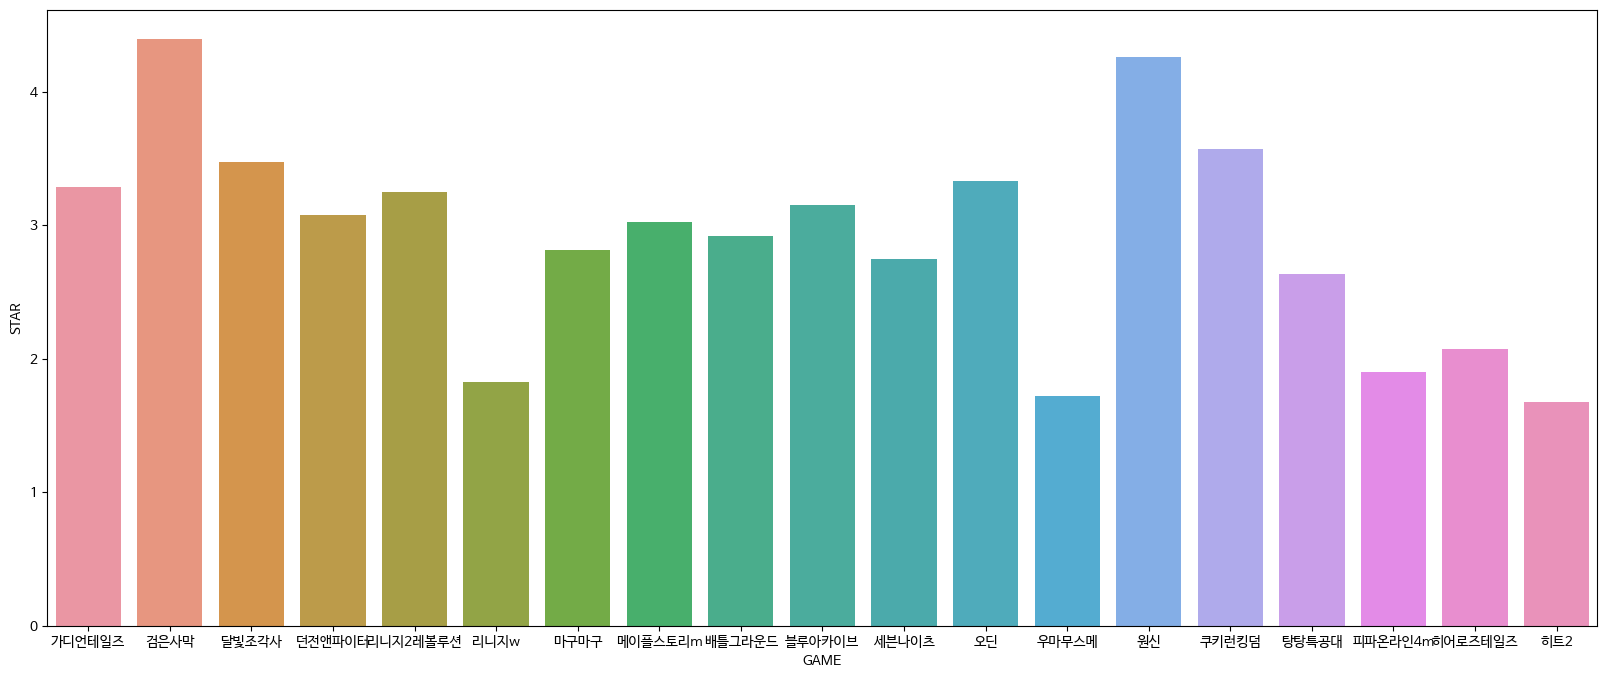

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x="GAME", y="STAR",data=game_all_meanstar)

In [ ]:
game_all_meanstar

,GAME,STAR
0,가디언테일즈,3.286000
1,검은사막,4.394000
2,달빛조각사,3.472000
3,던전앤파이터,3.078000
4,리니지2레볼루션,3.252000
5,리니지w,1.826000
6,마구마구,2.812000
7,메이플스토리m,3.022000
8,배틀그라운드,2.922000
9,블루아카이브,3.150000


#워드클라우딩

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 39.4 MB/s eta 0:00:00


In [ ]:
# *- encoding: utf-8 -*- 패키지 불러오는 작업
import json
import ast
import sys
import re #정규 표현식 가지고 오는 패키지
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma

In [ ]:
# 토큰화 : 쪼개는거
# 태깅 : 명사 , 동사 구분해주는 것  ( 명사,동사 or 명사 형용사)
# 빈도
# 어린왕자 : 8 , 떡 : 10 ,
# 글씨크기가 달라지고 - > 워드 클라우드

In [ ]:
game_all["ALL_TEXT"]=game_all["TITLE"]+game_all["REVIEW"]

In [ ]:
game_data_text=game_all["ALL_TEXT"].tolist()

In [ ]:
#tokenizer-> 쪼갤거에요 word 토큰화
#pos tagging 다양하게 -> okt, kkma, mecab 다양하게 있었어요 , -> okt 트위터 할꺼에요
#pos tagging -> pos (품사), tagging(붙여주는 )
#stop word ->

ff=open('텍스트데이터.txt','w')

from konlpy.tag import Okt
okt=Okt() #함수 이름 새롭게 정의
documents1=[]

# def : 함수 선언

# 안녕하세요 저는 머신러닝 입니다.
# 저 는 머신러닝 입니다. => 저 noun 는 josa  okt.pos 일
# 안녕하세요 ㅋㅋㅋㅋㅋ 반갑습니다 -> 안녕하세요 반갑습니다.
# 바뀌는 바뀌다 바뀔까 바뀌네 -> 바꾸다.

# 안녕하세요 저는 머신러닝 입니다
# 안녕 하세요 저 는 머신 러닝 입니다.

# 은 는 이 가 -> 1글자 -> 빼고 들고올거임


def tokenizer(raw, pos=["Noun"], stopword=["게임"]):
    return [
        word for word, tag in okt.pos( #okt.pos 태깅을 해서 word  사람 tag Adverb
            raw,
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

documents1=tokenizer(str(game_data_text))
print(documents1)

for b in range(0,len(documents1)):
    fb=documents1[b]
    ff.write('%s \n'%fb)

ff.close()

['초보', '고수', '화목', '한게임', '경쟁', '분위기', '길드', '고수', '운영', '갑자기', '다른', '그대로', '이번', '업뎃', '현상', '렉땜', '자꾸', '캐릭', '지금', '월드', '부활', '계속', '아이폰', '프로', '거울', '균열', '튕겨', '카마', '결과', '튕겨', '레이드', '튕겨', '스토리', '튕겨', '보스', '튕겨', '하라', '고요', '진짜', '리뷰', '한숨', '리뷰', '소액', '현질', '욀케', '스토리', '진짜', '굿겜', '문제점', '스코겜', '스토리', '난이도', '정도', '스토리', '진행', '진화', '노가다', '문제점', '확률', '쓰레기', '무기', '전용', '무기', '하나', '문제점', '크리스탈', '내용', '관련', '문제', '고치', '문제', '카카오', '쥐꼬리', '만큼', '저희', '과금', '유저', '유저', '차이', '마지막', '스토리', '시작', '스토리', '문제', '때문', '준비', '개발자', '제발', '문제', '해결', '닌텐도', '핸드폰', '다운', '리뷰', '진짜', '이번', '주말', '땜시', '주말', '도둑', '책임', '진짜', '섭종', '진짜', '섭종', '진짜', '지금', '추천', '사가', '스토리', '밀고', '테꿀잼', '집대성', '치뷰', '리뷰', '확률', '확정', '소환', '확률', '망겜', '데기', '다이아', '삽구', '데기', '와중', '친구', '몇개', '계정', '삭제', '박움', '진짜', '캐릭터', '개성', '스토리', '방식', '무엇', '부족함', '계속', '순간', '방치', '캐릭터', '베스', '때문', '무용지물', '무언', '압박', '진짜', '주말', '오전', '시작', '지금', '오후', '폰겜', '해도', '진짜', '콘솔', '그냥', '비판', '리뷰', '대부분', '

In [ ]:
# pos tagging, tag 종류 확인
# Adjective Noun Verb 주로 사용
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
import csv, sys
import numpy as np
# tf , tf-idf -> sklearn tf -> countVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
openFileName = '텍스트데이터.txt'

f = open(openFileName, 'r')
data = f.read()
f.close()

In [ ]:
data = [data]
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [ ]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'초보': 25,
 '고수': 8,
 '화목': 1,
 '한게임': 22,
 '경쟁': 20,
 '분위기': 7,
 '길드': 32,
 '운영': 427,
 '갑자기': 152,
 '다른': 194,
 '그대로': 67,
 '이번': 142,
 '업뎃': 148,
 '현상': 207,
 '렉땜': 1,
 '자꾸': 259,
 '캐릭': 123,
 '지금': 264,
 '월드': 50,
 '부활': 15,
 '계속': 572,
 '아이폰': 937,
 '프로': 106,
 '거울': 1,
 '균열': 5,
 '튕겨': 227,
 '카마': 1,
 '결과': 21,
 '레이드': 24,
 '스토리': 399,
 '보스': 78,
 '하라': 129,
 '고요': 19,
 '진짜': 762,
 '리뷰': 244,
 '한숨': 7,
 '소액': 8,
 '현질': 395,
 '욀케': 1,
 '굿겜': 5,
 '문제점': 16,
 '스코겜': 1,
 '난이도': 60,
 '정도': 281,
 '진행': 185,
 '진화': 9,
 '노가다': 36,
 '확률': 247,
 '쓰레기': 156,
 '무기': 83,
 '전용': 6,
 '하나': 296,
 '크리스탈': 20,
 '내용': 29,
 '관련': 37,
 '문제': 298,
 '고치': 24,
 '카카오': 162,
 '쥐꼬리': 1,
 '만큼': 8,
 '저희': 12,
 '과금': 613,
 '유저': 906,
 '차이': 39,
 '마지막': 36,
 '시작': 313,
 '때문': 198,
 '준비': 17,
 '개발자': 106,
 '제발': 400,
 '해결': 217,
 '닌텐도': 5,
 '핸드폰': 78,
 '다운': 146,
 '주말': 7,
 '땜시': 2,
 '도둑': 7,
 '책임': 7,
 '섭종': 15,
 '추천': 90,
 '사가': 20,
 '밀고': 8,
 '테꿀잼': 1,
 '집대성': 1,
 '치뷰': 1,
 '확정': 13,
 '소환': 23,
 '망겜': 112,
 

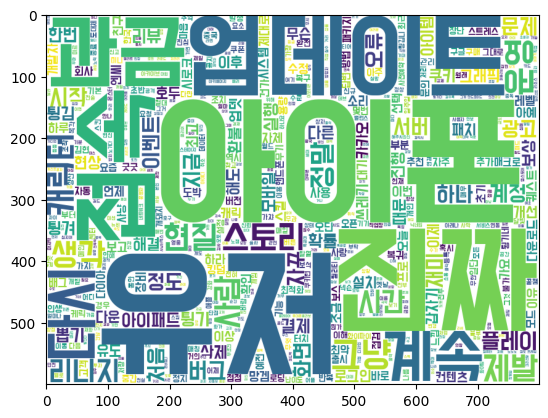

In [ ]:
from wordcloud import WordCloud

w=WordCloud(font_path='BMDOHYEON_ttf.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=1000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)

plt.show()

In [ ]:
# 긍부정 -> 워드클라우드
# 게임 별 -> 워드클라우드
# 리뷰수가 많은 애들 -> 워드클라우드
# 명사 -> 형용사 , 동사 바꿔나가면서 유저 파악
# TFIDF / COUNT VECTORIZER 가 다른것들을 파악